In [1]:
"""
4. 의사결정트리
    -데이터 분류 및 회귀에 사용되는 지도학습 알고리즘
    -장점: 결과값에 대한 이해가 쉬우며 정확도가 높음, 수치 및 범주데이터 모두에 사용 가능
    -단점: 과대적합되기 쉬움
    
    (1) [이론]
        (i) 의사결정 트리 알고리즘의 이해
            -머신러닝에서 의미있는(효율적인) 질문이란 의미있는 특징을 의미, 의사결정 트리에서 영향력이 큰 특징을 이용하여 레이블을 찾게 됨
        
        (ii) 의사결정 트리 알고리즘과 정보 엔트로피의 관계
            - 정보이론에서 불확실성을 수치로 표현한 값이 '알고리즘', '정보이득'이란 질문 이전 엔트로피에서 질문 후의 엔트로피를 뺀 값 = 불확실성이 줄어든 정도 ; 수식으로 표현하면 G(T,X) = Entropy(T) - Entropy(T,X)
            - 확률을 바탕으로 엔트로피를 구하면 Entropy = ∑(i=1->m){-p_i*log_2(p_i)} = ∑(c∈X){P(c)*E(c)} , X는 선택된 특징, c는 선택된 특징에 의해 생성되는 하위 노드, P(c)는 선택된 특징에 의해 생성된 하위 노드에 데이터가 속할 확률, E(c)는 선택된 특징에 의해 생성된 하위 노드의 엔트로피
            - 지니계수 : 특징에 의한 분리가 이진분류로 나타날 경우 사용; 사이킷런의 의사결정트리는 CART(Classification and regression tree) 타입 ->기본적으로 지니계수를 사용
            - 지니계수가 높을 수록 순도가 높음 = 그룹 내 데이터들의 속성들이 많이 일치
            ex)   군대여부     긴생머리 여부    성별
                1   O               X            남
                2   X               X            여
                3   O               X            남
                4   X               O            여
                5   O               X            남
                6   X               X            여
                군대 or 긴생머리 특징을 통해 남자와 여자를 구분하는게 목적일 때
                엔트로피 = -p(남자)*log(p(남자)) - p(여자)*log(p(여자)) = -(3/6) * log(3/6) - (3/6) * log(3/6) = 1 : 최초 엔트로피는 1
                군대라는 특징으로 분리했을 때 엔트로피 = 3/6 * E[3,0] + 3/6 * E[0,3] = 3/6 * (-(3/3)*log(3/3) - (0/3)*log(3/0)) + 3/6 * (-(0/3)log0 - (3/3)*log(3/3)) = 0 ; E[3,0],E[0,3] 은 군대라는 특징으로 갈려진 그룹의 Entropy
                긴생머리라는 특징으로 분리했을 때 엔트로피 = 1/6 * E[0,1] + 5/6*E[3,2] = 1/6 *(-(0/1)*log(0/1) - (1/1)*log(1/1)) + 5/6 * (-(3/5)*log(3/5) - (2/5)*log(2/5)) = 0.966
                정보이득은 군대 특징을 이용했을 때 1, 긴생머리 특징을 이용했을 때 0.034
                
                군대특징을 이용한 지니계수는
                군대를 다녀옴 : (0/3)^2 + (3/3)^2 = 1
                군대를 다녀오지 않음 : (3/3)^2 + (0/3)^2 = 1
                군대특징의 지니계수 = 3/6 * 1 + 3/6 * 1 = 1
                
                긴생머리특징을 이용한 지니계수는
                긴생머리 : (1/1)^2 + (0/1)^2 = 1
                긴생머리 아님 : (2/5)^2 + (3/5)^2 = 13/25
                긴생머리 특징의 지니계수 = 1/6 * 1 + 5/6 * 13/25 = 0.6
                
                -> 군대의 지니계수가 1로, 긴새엄리 지니계수보다 높으므로 상위 노드로 이용
                
        (iii) 다중분류
            -의사결정트리는 다중분류에도 탁월한 성능
        
        
"""

#[실습] 서울 지역(강동, 강서, 강남, 강북) 다중 분류하기
#테스트 데이터
import pandas as pd
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]
train_df = pd.DataFrame(district_dict_list)
tarin_df = train_df[['district', 'longitude', 'latitude','label']]

#테스트 데이터
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [2]:
#학습 데이터의 레이블 분포
train_df.label.value_counts()

Gangseo     5
Gangdong    5
Gangnam     5
Gangbuk     5
Name: label, dtype: int64

Text(0.5, 1, 'district visualization in 2d plane')

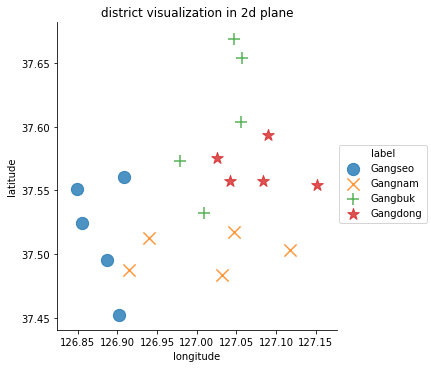

In [3]:
#데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('longitude', 'latitude', data=train_df, fit_reg = False , scatter_kws = {"s":150}, markers=["o","x","+","*"], hue="label")
plt.title('district visualization in 2d plane')

In [4]:
#데이터 다듬기 - 구 이름과 동 이름은 학습에 필요없으므로 제거
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'],axis=1, inplace = True)

X_train = train_df[['longitude','latitude']]
Y_train = train_df[['label']]

X_test = test_df[['longitude','latitude']]
Y_test = test_df[['label']]

C:\Users\1\anaconda3\envs\virtualtensor3.6\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


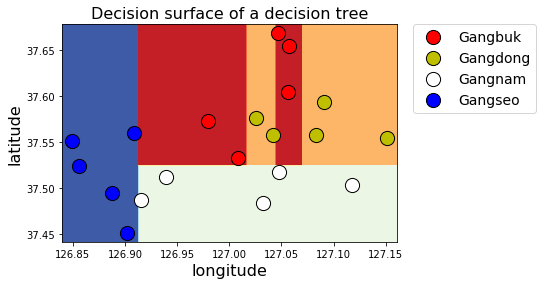

In [5]:
# 모델 학습
from sklearn import tree
import numpy as np
from sklearn import preprocessing

#학습된 의사결정 트리를 시각화하면
def display_decision_surface(clf,X,y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_) #le.classes_는 label의 개수
    plot_colors = 'rywb'
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)) #좌표계 만들기
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #좌표계에 분류기준 만들기
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu) #분류기준을 색으로 표현(그림에서 바탕색으로 표시되는 부분)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label = le.classes_[i], cmap = plt.cm.RdYlBu, edgecolor = 'black', s=200)
    
    plt.title("Decision surface of a decision tree", fontsize = 16)
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0, fontsize = 14)
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize = 16)
    plt.rcParams['figure.figsize'] = [7,5]
    plt.rcParams['font.size'] = 14
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()
    
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y_train)
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

display_decision_surface(clf, X_train, y_encoded)
    

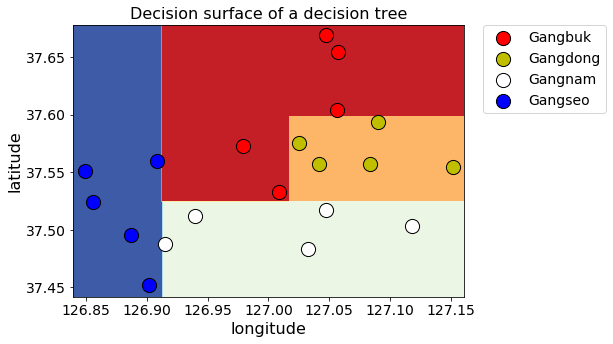

In [6]:
#위의 결과는 파라미터를 따로 설정하지 않았기 때문에 과대적합되었음
#과대적합을 피하기 위해 별도의 파라미터를 설정해주면
clf = tree.DecisionTreeClassifier(max_depth=4, #트리의 최대 한도 깊이
                                  min_samples_split=2, #자식 노드를 갖기 위한 최소한의 데이터 개수
                                  min_samples_leaf=2, #리프 노드의 최소 데이터 개수
                                  random_state=70 #동일한 정수를 입력했을 때 결과를 항상 같게 만들어주는 파라미터
                                 ).fit(X_train, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded)


In [7]:
le.classes_

array(['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'], dtype=object)

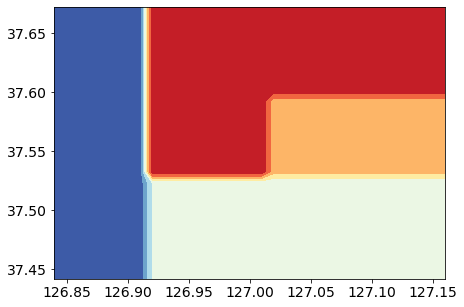

In [8]:
x_min = X_train.longitude.min() - 0.01
x_max = X_train.longitude.max() + 0.01
y_min = X_train.latitude.min() - 0.01
y_max = X_train.latitude.max() + 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) #좌표계 만들기
    
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

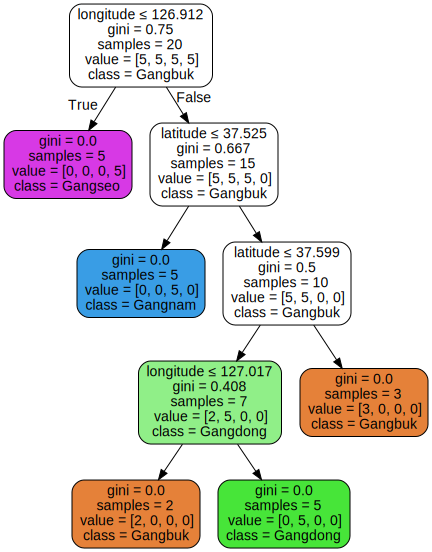

In [11]:
#의사결정 트리 시각화 -> Window 운영체제에서는 graphviz를 사용하기 위해 (i) pip install graphviz (ii) graphviz 웹사이트에서 설치파일 다운로드(https://graphviz.gitlab.io/_pages/Download/Download_windows.html 에서 stable window installer -> 10 -> cmake -> release) (iii) path 시스템 환경변수에 C:\Program files (x86)\Graphviz2.38\bin 경로 추가
# OR Window development package 에서 msbuild로 설치 후 오류 뜨거나 실행 안되면 cmd로 dot.exe 파일 실행한 후 해보기!
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul") #seoul이란 이름의 파일로 저장

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [16]:
# 모델 테스트
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
print("accuracy :" + str(accuracy_score(Y_test.values.ravel(), le.classes_[pred])))

accuracy :1.0


In [18]:
comparison = pd.DataFrame({'prediction' : le.classes_[pred], 'ground_truth' : Y_test.values.ravel()})
comparison

,ground_truth,prediction
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


In [ ]:
"""
5. 나이브 베이즈
    - 확률기반 머신러닝 분류 알고리즘의 대표
    - 장점 : 실전에서 높은 정확도(특히 문서 분류 or 스팸 분류)/ 계산속도가 빠름
    - 단점 : 모든 데이터의 특징을 독립적이라고 가정 -> 다른 분류에서는 제약으로 작용할 가능성이 높음
    
    (1). [이론]
        (i) 나이브 베이즈 알고리즘의 이해
            - 데이터를 단순하게(나이브) 독립적인 사건으로 가정하고 독립 사건들을 베이즈 이론에 따라 가장 높은 확률의 레이블로 분류를 실행
            - 베이즈 이론 : P(A|B) = P(B|A)*P(A)/P(B) = P(A∩B)/P(B)
        
        (ii) 나이브 베이즈 알고르짐을 머신러닝에 응용하는 법
            - A를 레이블, B를 데이터의 특징으로 대입해보면 P(레이블|데이터 특징) = P(데이터 특징|레이블) * P(레이블) / P(데이터 특징)
            - 데이터 특징이 B와 C 두가지면 P(A | B, C) = P(B, C| A) * P(A) / P(B,C)
            - 이때 P(B,C) 는 결합확률로 P(B|C) * P(B) 와 같지만, 나이브 베이즈에서는 사건들을 모두 독립적인 사건으로 보고 P(B,C) = P(B) * P(C)로 간주
            - 따라서 P(A| B,C) = P(B|A) * P(C|A) * P(A) | P(B) * P(C)
        
        (iii) 특징이 여러개인 경우 나이브 베이즈 공식
            - P(y|x1, ..., xn) = P(x1|y) * P(x2|y) * ... * P(xn|y) * P(y) / P(x1)*...*P(xn)
            - 이때 P(x1) * ... * P(xn) 은 모든 레이블에 들어가는 공통분모이므로 제거 가능, 공통 분모를 제거 후 가장 높은 수치를 지닌 레이블로 데이터를 분류
        
        (iv) 가우시안 나이브 베이즈 분류 : 데이터가 연속적인 경우
            - 특징 값들이 정규분포돼 있다는 가정하에 조건부 확률 계산
            - 이산적인 데이터의 경우 다항 분포 or 베르누이 나이브 베이즈 중 하나를 사용
        
        (v) 스무딩
            - 이산적인 데이터의 경우 빈도수가 0인 경우가 발생 -> 빈도수에 1을 더해 확률이 0이 되는 현상을 방지
        
"""

In [22]:
#2.[실습] : 가우시안 나이브 베이즈를 활용한 붓꽃(Iris) 분류
import pandas as pd
from sklearn.datasets import load_iris # 사이킷런에 내장된 예제 데이터 iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #가우시안나이브베이즈
from sklearn import metrics
from sklearn.metrics import accuracy_score

#데이터 획득
dataset = load_iris() #아이리스 데이터를 불러옴
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'}) # 타깃 데이터를 이해하기 쉽게 문자로 변경
df.head()

#sepal length/width : 꽃받침 길이/너비 ; petal length/width : 꽃잎 길이/너비 ; target : 붓꽃의 종류 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
#데이터 시각화
setosa_df = df[df.target =='setosa']
versicolor_df = df[df.target=='versicolor']
virginica_df = df[df.target =='virginica']

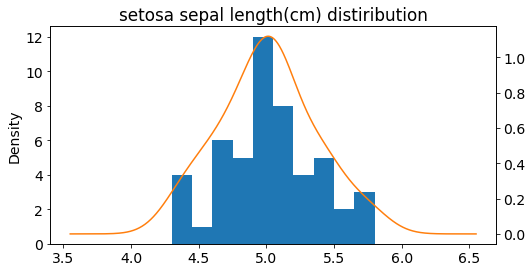

In [28]:
#setosa 꽃받침 길이에 따른 분포도를 그려보면
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y = True, title = "setosa sepal length(cm) distiribution", figsize = (8,4))
#결과를 보면 정규분포와 매우 유사한 것을 알 수 있음 -> 같은 방식으로 꽃받침 너비, 꽃잎 길이, 꽃잎 너비에 따른 분포도 정규분포와 유사한 것을 확인 가능
#데이터 특징이 정규분포를 따르므로 가우시안 베이즈 나이브 분류기로 분류하기에 적합

In [34]:
#데이터 다듬기
#전체 데이터 중 20%를 테스트 데이터로 분리, 나머지 80%를 학습에 사용
X_train,X_test,y_train,y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [35]:
#가우시안 나이브 베이즈 모델 학습
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [36]:
#테스트
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        30



In [44]:
#정확도 확인
accuracy_score(y_test,predicted) #accuracy_score(Y 테스트 데이터, 예측 데이터) ; 데이터는 모두 배열 형식으로

1.0

In [46]:
print(metrics.confusion_matrix(expected, predicted)) #혼동행렬

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]


In [45]:
#3.[실습] : 베르누이 나이브 베이즈를 활용한 스팸 분류
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [47]:
#데이터 획득
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
df = pd.DataFrame(email_list)

In [49]:
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [50]:
#데이터 다듬기 -> 사이킷런의 베르누이 나이브 베이즈 분류기는 숫자만 다루므로 True와 False를 1과 0으로 치환
df['label'] = df['spam'].map({True:1,False:0})
#학습에 사용할 데이터와 레이블 분로
df_x = df['email title']
df_y = df['label']

#베르누이 나이브 베이즈의 입력데이터는 고정된 크기의 벡터여야 함 -> 사이킷런의 CountVectorizer 이용
cv = CountVectorizer(binary=True) #binary = True로 설정하면 이메일 제목에 특정 단어가 출현할 경우 무조건 1을, 단어가 출현하지 않을 경우에는 0을 갖도록 설정
x_traincv = cv.fit_transform(df_x)

#이메일 제목이 어떻게 벡터로 인코딩 됐는지 확인
encoded_input = x_traincv.toarray()
encoded_input
# 이메일에 사용된 단어가 5개 통틀어서 총 17개이므로 17개 크기의 벡터로 인코딩

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [51]:
#벡터가 의미하는 단어 확인
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [52]:
#고정된 벡터의 인덱스가 어떤 단어를 의미하는지 알아보려면
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [56]:
#베르누이 나이브 베이즈모델 학습하기
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [57]:
#테스트 데이터 다듬기
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x=test_df["email title"]
test_y=test_df["label"]
x_testcv=cv.transform(test_x)

#테스트
predictions = bnb.predict(x_testcv)

#정확도 확인
accuracy_score(test_y,predictions)

0.8333333333333334

In [1]:
# 4.[실습] 다항분포 나이브 베이즈를 활용한 영화 리뷰 분류
import numpy as pd
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#데이터 획득 - 영화 리뷰 
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [2]:
#데이터 다듬기
df['label'] = df['type'].map({'positive':1, 'negative' :0})
df_x = df['movie_review']
df_y = df['label']

In [5]:
#입력데이터 값 벡터로 표현
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [6]:
#단어를 확인하려면
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [7]:
#벡터 각각의 의미를 확인 하려면
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [8]:
#다항분포 나이브베이즈 모델 학습하기
#나이브베이즈 분류기는 기본적으로 스무딩을 지원하므로 학습 데이터에 없던 단어가 있어도 무방
mnb = MultinomialNB()
y_train=df_y.astype('int')
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
#테스트 데이터 다듬기
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({"positive":1,"negative":0})
test_x=test_df["movie_review"]
test_y=test_df["label"]

In [10]:
#테스트
x_testcv = cv.transform(test_x)
predictions=mnb.predict(x_testcv)

In [11]:
#정확도 확인
accuracy_score(test_y, predictions)

1.0